<a href="https://colab.research.google.com/github/Fadiasitinursifa/UAS_PCD/blob/main/klasifikasi_burung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

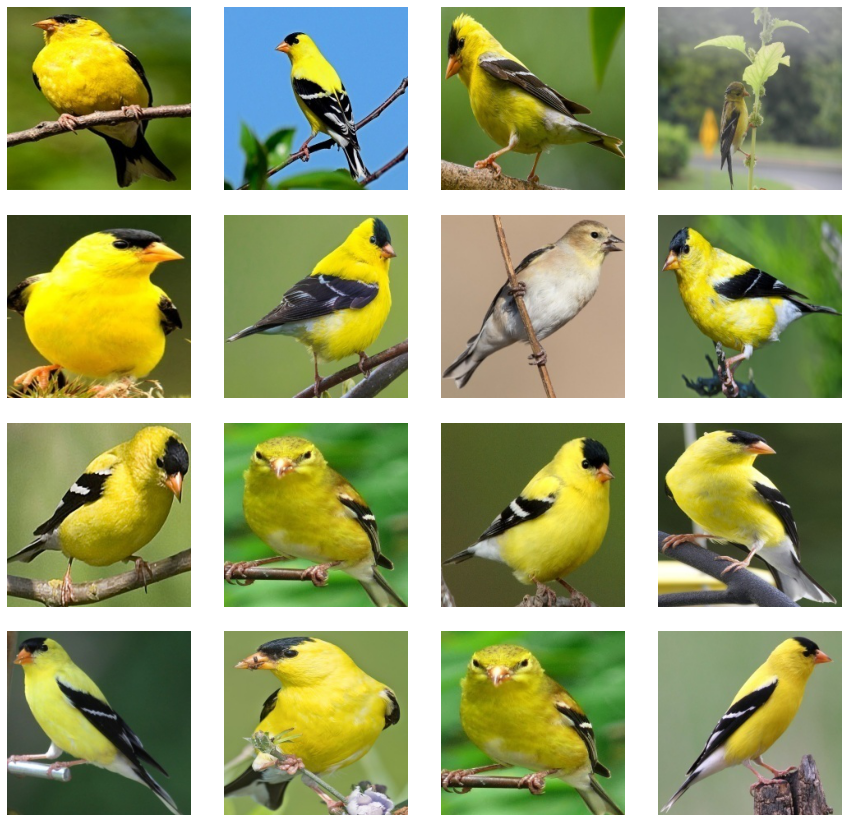

In [ ]:
# Ploting 12 image to checking dataset 
plt.figure(figsize=(12, 12))
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/AMERICAN GOLDFINCH'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    plt.axis('off')

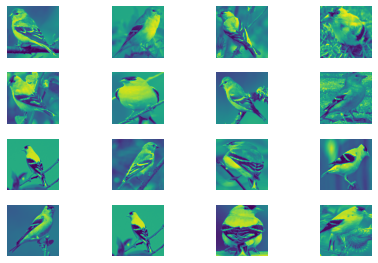

In [ ]:
for  x in range(1,17):
    plt.subplot(4,4,x)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    gray_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray_img)
    plt.xlabel(gray_img.shape[1], fontsize = 10)
    plt.ylabel(gray_img.shape[0], fontsize = 10)
    plt.axis('off')

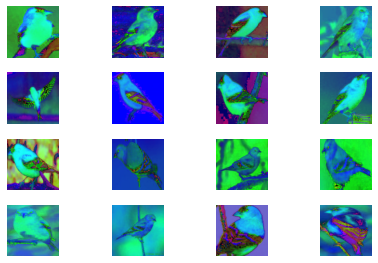

In [ ]:
for y in range(1,17):
    plt.subplot(4,4,y)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    hsv_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2HSV)
    plt.imshow(hsv_img)
    plt.xlabel(hsv_img.shape[1], fontsize = 10)
    plt.ylabel(hsv_img.shape[0], fontsize = 10)
    plt.axis('off')

In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/Datasets'
root_dir = listdir(dir)
image_list, label_list = [], []

In [ ]:
# Reading and converting image to numpy array 
for directory in root_dir:
  for files in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{files}'
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [ ]:
# Visualize the number of class count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [ ]:
# Storing number of class
num_classes = len(label_counts)
num_classes

6

In [ ]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [ ]:
# Checking Labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

In [ ]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [ ]:
# Normalize and reshape data 
x_train = np.array(x_train, dtype = np.float16) / 225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [ ]:
# Label binarizing 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [ ]:
# Spliting the training data set into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [ ]:
# Compiling model 
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005), metrics=['accuracy'])

In [ ]:
# Training the model 
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10
5/5 [==============================] - 1s 137ms/step - loss: 1.0659 - accuracy: 0.6448 - val_loss: 1.1104 - val_accuracy: 0.5846
Epoch 2/10
5/5 [==============================] - 0s 83ms/step - loss: 0.9589 - accuracy: 0.7510 - val_loss: 1.1614 - val_accuracy: 0.5615
Epoch 3/10
5/5 [==============================] - 0s 86ms/step - loss: 0.9181 - accuracy: 0.6911 - val_loss: 0.9804 - val_accuracy: 0.6615
Epoch 4/10
5/5 [==============================] - 0s 83ms/step - loss: 0.8472 - accuracy: 0.7278 - val_loss: 0.9748 - val_accuracy: 0.6692
Epoch 5/10
5/5 [==============================] - 0s 83ms/step - loss: 0.7670 - accuracy: 0.7548 - val_loss: 0.9472 - val_accuracy: 0.6462
Epoch 6/10
5/5 [==============================] - 0s 80ms/step - loss: 0.8331 - accuracy: 0.7201 - val_loss: 0.9179 - val_accuracy: 0.6385
Epoch 7/10
5/5 [==============================] - 0s 81ms/step - loss: 0.7583 - accuracy: 0.7317 - val_loss: 0.7693 - val_accuracy: 0.7308
Epoch 8/10
5/5 [==========

In [ ]:
# Saving model 
model.save('/content/drive/MyDrive/bird_species.h5')

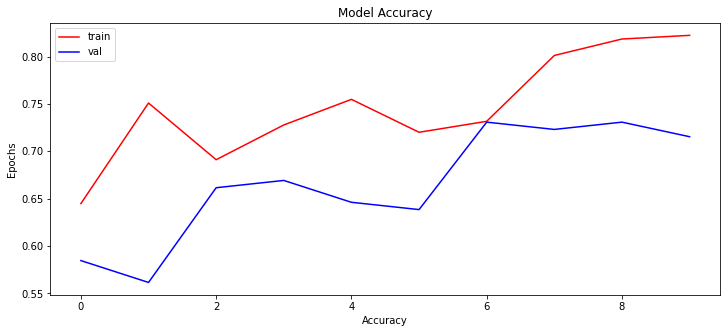

In [ ]:
# Plot the training history 
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.xlabel('Accuracy') 
plt.ylabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

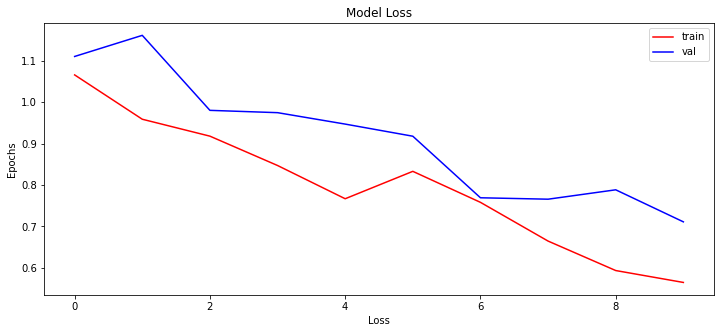

In [ ]:
# Plot the loss history 
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.xlabel('Loss') 
plt.ylabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Calculating test accuracy 
score = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {score[1]*100}')

6/6 [==============================] - 0s 14ms/step - loss: 0.7556 - accuracy: 0.6933
Test Accuracy : 69.32515501976013


In [ ]:
# Storing predictions 
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 13ms/step


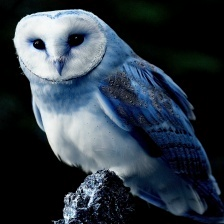

In [ ]:
# Ploting image to compare 
img = array_to_img(x_test[10])
img

In [ ]:
# Finding max value from prediction list and comaparing original value vs predicted 
labels = lb.classes_
print(labels)
print('Originally : ', labels[np.argmax(y_test[10])])
print('Prediction : ', labels[np.argmax(y_pred[10])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  BARN OWL
Prediction :  BARN OWL
